# Regression Algorithms
This notebook will demonstrate use and accuracy of the regression algorithms as implemented in this repo. These algorithms include KNN, Linear Regression, Ridge Regression, and LASSO Regression.

In [ ]:
# Fix project root
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Import dependencies, utilities, algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from ml_algs.supervised.regression.r_knn import KNN_Reg
from ml_algs.supervised.regression.reg_lin import Lin_Reg
from ml_algs.supervised.regression.ridge_lasso import Ridge, Lasso, Lin
from sklearn.datasets import fetch_california_housing

# Load California dataset
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Now, all of the necessary packages have been imported, including the "California Housing" dataset that I will use for analysis. This dataset is the modern alternative to the classic "Boston Housing" dataset that is now considered an unethical dataset, as it uses race for prediction, where this dataset does not. It contains the following variables as predictors for the median house value in a district:
- Median income in the district

- Median age of houses in the district
- Average number of rooms per household
- Average number of bedrooms per household
- Population in the district
- Average number of occupants per household
- Latitude
- Longitude

With 20640 samples and a good reputation, this dataset is certainly adequate for regression. I will display a small sample of the dataset to make sure we know what we're working with.

In [16]:
df = pd.DataFrame(X, columns=feature_names)
df["MedHouseVal"] = y
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


The data appears to be in the proper form. However, as the features have not been standardized, it may be somewhat difficult to use my gradient descent algorithms on it directly, so I will scale the data first. Now, let's run the models on it and evaluate their accuracy.

In [17]:
X = (X - X.mean(axis=0)) / X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
def evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(name)
    print('---------------------------------------')
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print('---------------------------------------')
knn = KNN_Reg(k = 10)
linreg = Lin_Reg(lr = 0.01, epochs = 5000)
ridge = Ridge(lr = 0.01, epochs = 5000, alpha = 200)
lasso = Lasso(lr = 0.005, epochs = 8000, alpha = 20)
evaluate(knn, name = "KNN (k=10)")
evaluate(linreg, name = "Linear Regression w/GD")
evaluate(ridge, name = "Ridge Regression w/GD")
evaluate(lasso, name = "LASSO w/CD")

KNN (k=10)
---------------------------------------
MSE:  0.3946
RMSE: 0.6282
R²:   0.7032
---------------------------------------
Linear Regression w/GD
---------------------------------------
MSE:  0.5187
RMSE: 0.7202
R²:   0.6100
---------------------------------------
Ridge Regression w/GD
---------------------------------------
MSE:  0.5224
RMSE: 0.7227
R²:   0.6072
---------------------------------------
LASSO w/CD
---------------------------------------
MSE:  0.5196
RMSE: 0.7208
R²:   0.6093
---------------------------------------


The last three models have very similar diagnostics. Regardless, we can see that the models *work*. Additionally, KNN is outperforming the others. Let's look at some diagnostic plots.

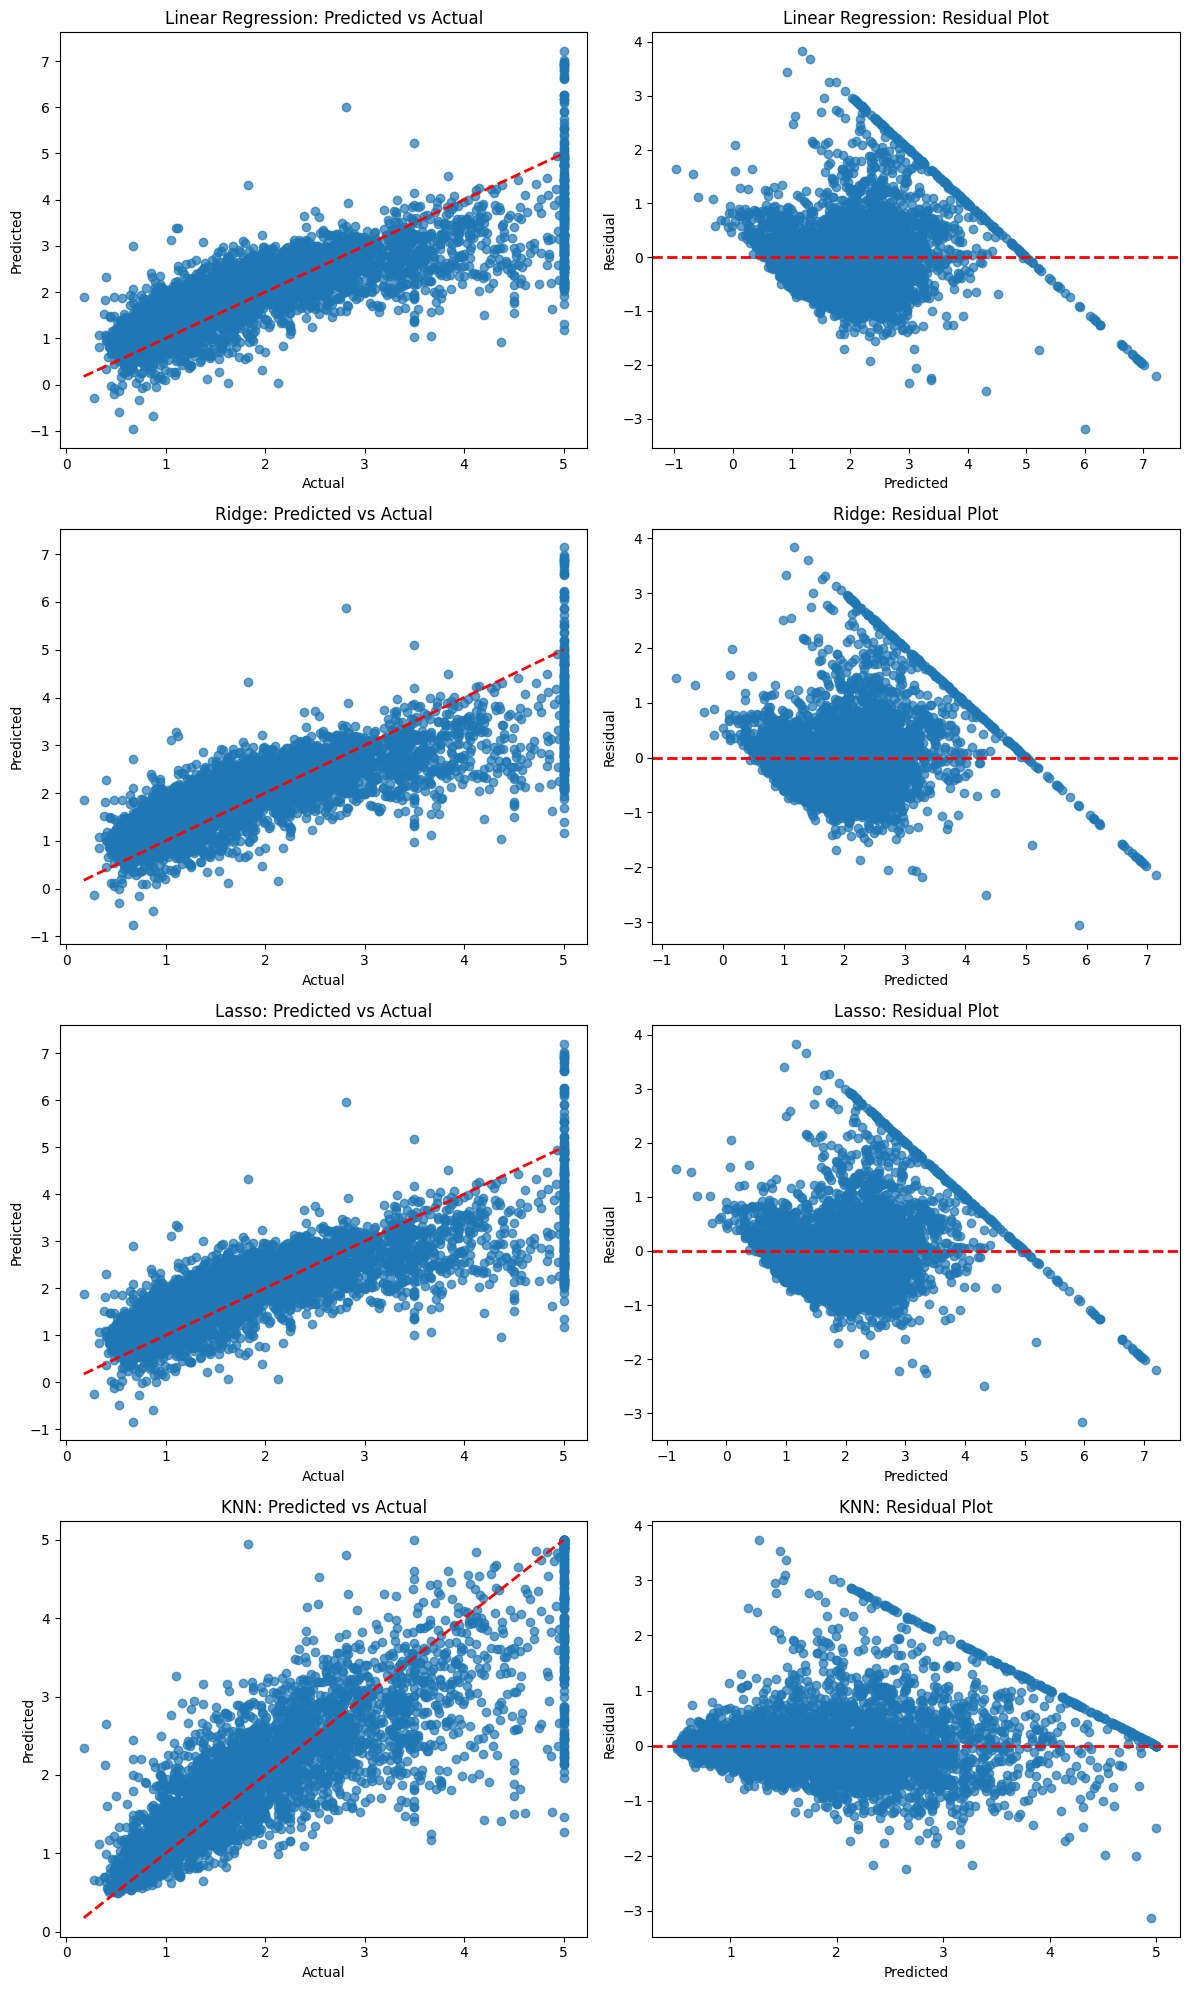

In [18]:
def plot_diagnostics(models, X, y, model_names=None):
    '''
    Plots predicted vs actual and residuals for multiple regression models.

    Parameters:
    - models: list of fitted regression models
    - X: features (test or full dataset)
    - y: true target values
    - model_names: optional list of names for models
    '''
    if model_names is None:
        model_names = [f'Model {i+1}' for i in range(len(models))]

    n_models = len(models)
    fig, axes = plt.subplots(n_models, 2, figsize=(12, 5*n_models))
    if n_models == 1:
        axes = np.array([axes])

    for i, model in enumerate(models):
        y_pred = model.predict(X)
        residuals = y - y_pred

        ax1 = axes[i, 0]
        ax1.scatter(y, y_pred, alpha=0.7)
        ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
        ax1.set_xlabel('Actual')
        ax1.set_ylabel('Predicted')
        ax1.set_title(f'{model_names[i]}: Predicted vs Actual')

        ax2 = axes[i, 1]
        ax2.scatter(y_pred, residuals, alpha=0.7)
        ax2.axhline(0, color='r', linestyle='--', lw=2)
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Residual')
        ax2.set_title(f'{model_names[i]}: Residual Plot')

    plt.tight_layout()
    plt.show()
models = [linreg, ridge, lasso, knn]
names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN']
plot_diagnostics(models, X_test, y_test, names)



KNN appears to handle the outliers more gracefully than the other algorithms, having cleaner residual plots and better diagnostics.